In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_result(n_samples, method, n_classes=10, tgt_dataset="MNIST", lr=1, m=0.9,
                n_epochs_wgd=20000, clip=False, path_results="./results_DD_init/"):
    
    for n in n_samples:
        path_acc = path_results + tgt_dataset +"/accuracy_" + tgt_dataset + "_" + method + "_n" + str(n) + \
                   "_lr" + str(lr) + "_m" + str(m) + "_nepochs" + str(n_epochs_wgd)
        
        L_acc = np.loadtxt(path_acc, delimiter=",")
        print(n, "Accuracy:", np.mean(L_acc), np.std(L_acc))

In [3]:
def show_imgs(n_samples, method, n_classes=10, tgt_dataset="MNIST", lr=1, m=0.9, n_epochs_wgd=20000,
              save=False, clip=True, path_results="./results_DD_init/"):
    path_imgs = path_results + tgt_dataset +"/synth_images_" + tgt_dataset + "_" + method + "_n" + str(n_samples) + \
               "_lr" + str(lr) + "_m" + str(m) + "_nepochs" + str(n_epochs_wgd)

    imgs = np.load(path_imgs+".npy")
 
    if tgt_dataset in ["MNIST", "NormalizedMNIST"]:
        labels = [f'{i}' for i in range(10)]  # Replace this with your actual labels
    elif tgt_dataset in ["FMNIST", "NormalizedFMNIST"]:
        labels = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
    
    if tgt_dataset == "CIFAR10":
        labels = ["Plane", "Car", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
        mean = [0.4914, 0.4822, 0.4465]
        std = [0.2023, 0.1994, 0.2010]
    elif tgt_dataset == "NormalizedMNIST":
        mean = [0.1307]
        std = [0.3081]
    elif tgt_dataset == "NormalizedFMNIST":
        mean = [0.2861]
        std = [0.3530]

    if tgt_dataset in ["MNIST", "FMNIST"]:
        if clip:
            imgs = np.clip(np.transpose(imgs, (1,0,2)).reshape(-1,28,28), 0, 1)
        else:
            imgs = np.transpose(imgs, (1,0,2)).reshape(-1,28,28)

    elif tgt_dataset in ["NormalizedMNIST", "NormalizedFMNIST"]:
        imgs = np.transpose(imgs, (1,0,2)).reshape(-1,28,28)
        imgs = imgs * std[0] + mean[0]
        imgs = np.clip(imgs, 0, 1)

    elif tgt_dataset == "CIFAR10":
        imgs = np.transpose(imgs, (1,0,2)).reshape(-1, 3, 32, 32)
        
        for k in range(3):
            imgs[:,k] = imgs[:,k] * std[k] + mean[k]
            
        imgs = np.clip(np.transpose(imgs, (0, 2, 3, 1)), 0, 1)
    
    # Create the plot
    fig, axes = plt.subplots(10, 10, figsize=(10, 10))  # 10x10 grid
    fig.subplots_adjust(hspace=0, wspace=0.05)  # Add spacing between rows
    
    for i, ax in enumerate(axes.flat):
        if "MNIST" in tgt_dataset:
            ax.imshow(imgs[i], cmap='gray')  # Adjust cmap if images are in color
        else:
            ax.imshow(imgs[i])

        ax.axis('off')  # Hide axes for clean visualization
        if i < 10:  # Add column labels to the top row
            ax.set_title(labels[i], fontsize=13) #, fontsize=10, pad=10)  # Customize as needed

    if save:
        plt.savefig("./Figures/imgs_DD_" + tgt_dataset + "_" + method + ".pdf", format="pdf", bbox_inches='tight')
    
    plt.show()

# Results

In [4]:
plot_n_samples = 50

## Results Normalized MNIST

In [31]:
# Baseline Random Coreset
tgt_dataset = "NormalizedMNIST"
path_results = "./results_DD_init/" + tgt_dataset

for n in [1, 10, 50]:
    path_acc_baseline =  path_results + "/accuracy_" + tgt_dataset + "_baseline" + "_n" + str(n)
    L_acc = np.loadtxt(path_acc_baseline, delimiter=",")
    print(n, "Accuracy:", np.mean(L_acc), np.std(L_acc))

1 Accuracy: 0.5578689018885294 0.01968904981727987
10 Accuracy: 0.9218750079472859 0.010963241893231763
50 Accuracy: 0.9764530340830485 0.0017309684381891604


In [32]:
n_samples = [1, 10, 50]
method = "dm"
tgt_dataset = "NormalizedMNIST"

plot_result(n_samples, method, tgt_dataset=tgt_dataset)

1 Accuracy: 0.6108545700709025 0.06535401365134197
10 Accuracy: 0.8824840863545735 0.02796938941174057
50 Accuracy: 0.9585921049118042 0.008541423645048932


In [33]:
n_samples = [1, 10, 50]
method = "mmdsw"
tgt_dataset = "NormalizedMNIST"

plot_result(n_samples, method, tgt_dataset=tgt_dataset)

1 Accuracy: 0.6654724041620891 0.05459960163291776
10 Accuracy: 0.9321324467658997 0.0067220390627209786
50 Accuracy: 0.9695727268854777 0.00196187360546566


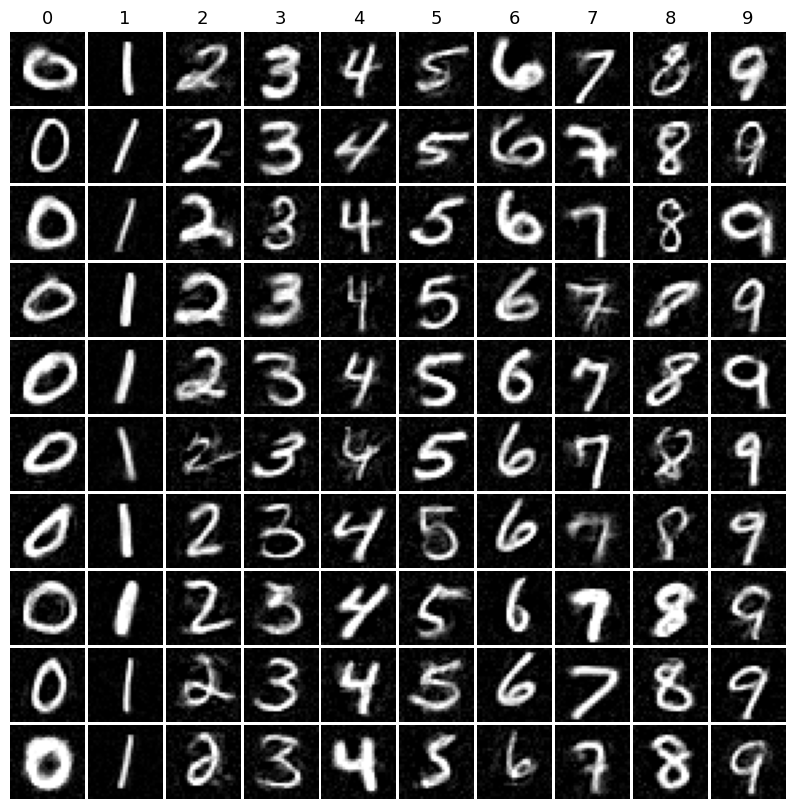

In [34]:
show_imgs(plot_n_samples, method, tgt_dataset=tgt_dataset)

In [35]:
n_samples = [10, 50]
method = "dm_aug"
tgt_dataset = "NormalizedMNIST"

plot_result(n_samples, method, tgt_dataset=tgt_dataset)

10 Accuracy: 0.8870687405268352 0.032610052170107075
50 Accuracy: 0.9528131683667501 0.014225713982279526


In [36]:
n_samples = [1, 10, 50]
method = "mmdsw_aug"
tgt_dataset = "NormalizedMNIST"

plot_result(n_samples, method, tgt_dataset=tgt_dataset)

1 Accuracy: 0.6682789405186971 0.05277980136070138
10 Accuracy: 0.9380971431732178 0.0065924552802727925
50 Accuracy: 0.974595288435618 0.0011280038884329772


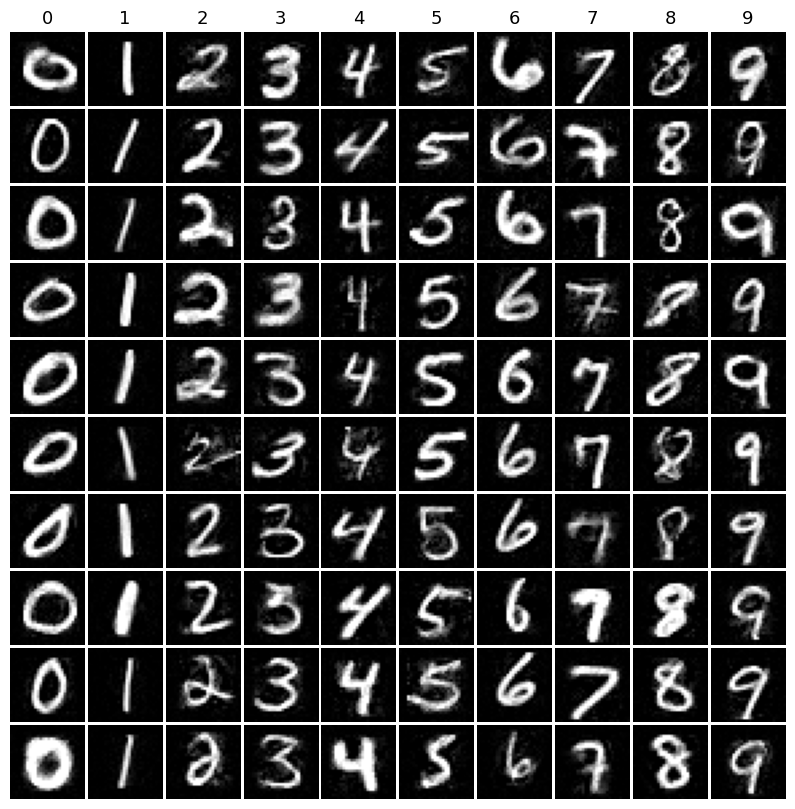

In [37]:
show_imgs(plot_n_samples, method, tgt_dataset=tgt_dataset, save=True)

In [38]:
n_samples = [1, 10, 50]
method = "dm_emb"
tgt_dataset = "NormalizedMNIST"

plot_result(n_samples, method, tgt_dataset=tgt_dataset)

1 Accuracy: 0.878038760026296 0.0060243863095648525
10 Accuracy: 0.9697054306666056 0.0009270700416152034
50 Accuracy: 0.9839503844579061 0.0004786263960454509


In [39]:
n_samples = [1, 10, 50]
method = "mmdsw_emb"
tgt_dataset = "NormalizedMNIST"

plot_result(n_samples, method, tgt_dataset=tgt_dataset)

1 Accuracy: 0.6033439556757609 0.03361348644861618
10 Accuracy: 0.9644174774487814 0.0023942958131045384
50 Accuracy: 0.9838110526402791 0.0007118174617287114


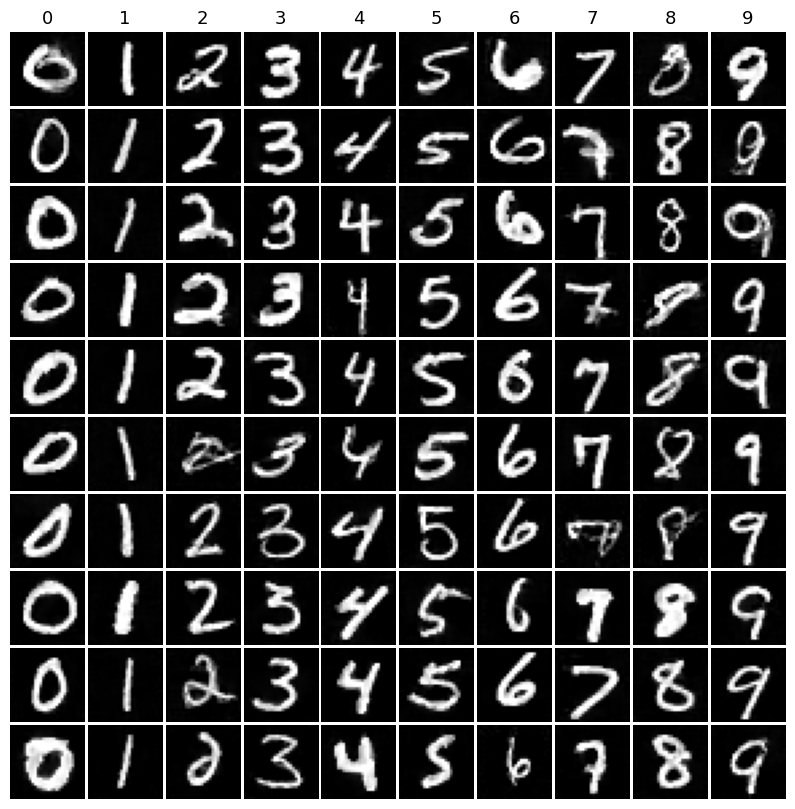

In [40]:
show_imgs(plot_n_samples, method, tgt_dataset=tgt_dataset)

In [41]:
n_samples = [1, 10, 50]
method = "dm_aug_emb"
tgt_dataset = "NormalizedMNIST"

plot_result(n_samples, method, tgt_dataset=tgt_dataset)

1 Accuracy: 0.8771098852157593 0.005325842504637242
10 Accuracy: 0.9697717785835266 0.0012288619230300143
50 Accuracy: 0.9836120049158732 0.000574202357917111


In [42]:
n_samples = [1, 10, 50]
method = "mmdsw_aug_emb"
tgt_dataset = "NormalizedMNIST"

plot_result(n_samples, method, tgt_dataset=tgt_dataset)

1 Accuracy: 0.609083084265391 0.03330035768070301
10 Accuracy: 0.9641653537750244 0.002588719088932984
50 Accuracy: 0.9837248047192891 0.000742868363000545


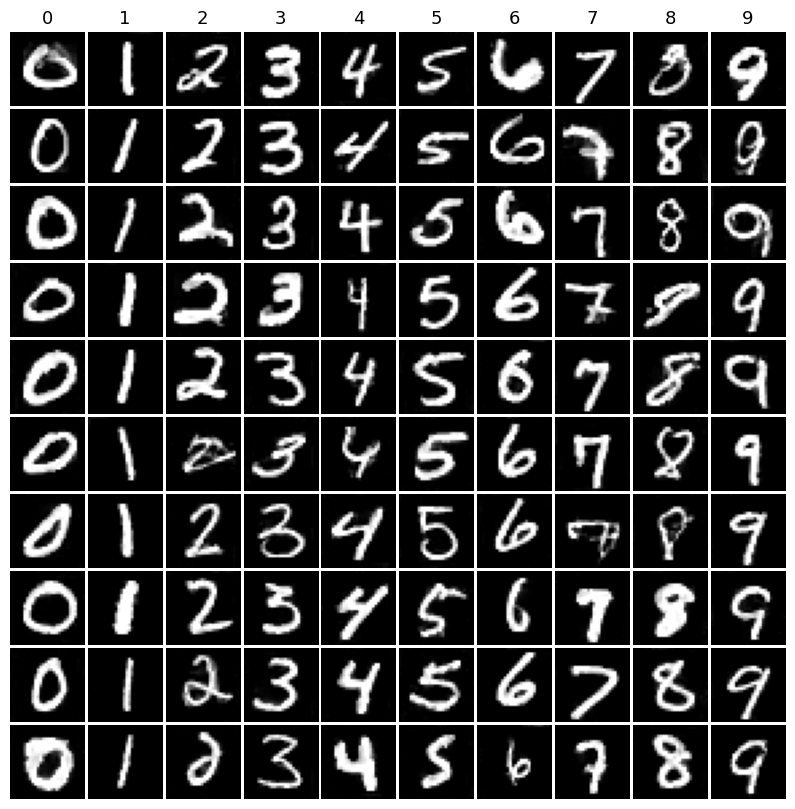

In [43]:
show_imgs(plot_n_samples, method, tgt_dataset=tgt_dataset, save=True)

## Results Normalized FMNIST

In [44]:
# Baseline Random Coreset
tgt_dataset = "NormalizedFMNIST"
path_results = "./results_DD_init/" + tgt_dataset

for n in [1, 10, 50]:
    path_acc_baseline =  path_results + "/accuracy_" + tgt_dataset + "_baseline" + "_n" + str(n)
    L_acc = np.loadtxt(path_acc_baseline, delimiter=",")
    print(n, "Accuracy:", np.mean(L_acc), np.std(L_acc))

1 Accuracy: 0.49020037849744164 0.0748825177863149
10 Accuracy: 0.752899420261383 0.006753640151043352
50 Accuracy: 0.8321191668510437 0.0026535646225614388


In [45]:
n_samples = [1, 10, 50]
method = "dm"
tgt_dataset = "NormalizedFMNIST"

plot_result(n_samples, method, tgt_dataset=tgt_dataset)

1 Accuracy: 0.5444864710172017 0.0321190859492581
10 Accuracy: 0.7455812255541484 0.009894925737091317
50 Accuracy: 0.8128649353981018 0.004602282388985082


In [46]:
n_samples = [1, 10, 50]
method = "mmdsw"
tgt_dataset = "NormalizedFMNIST"

plot_result(n_samples, method, tgt_dataset=tgt_dataset)

1 Accuracy: 0.5997478842735291 0.04051895522946185
10 Accuracy: 0.7566613674163818 0.009748750592879232
50 Accuracy: 0.8421842018763225 0.0014763680935455817


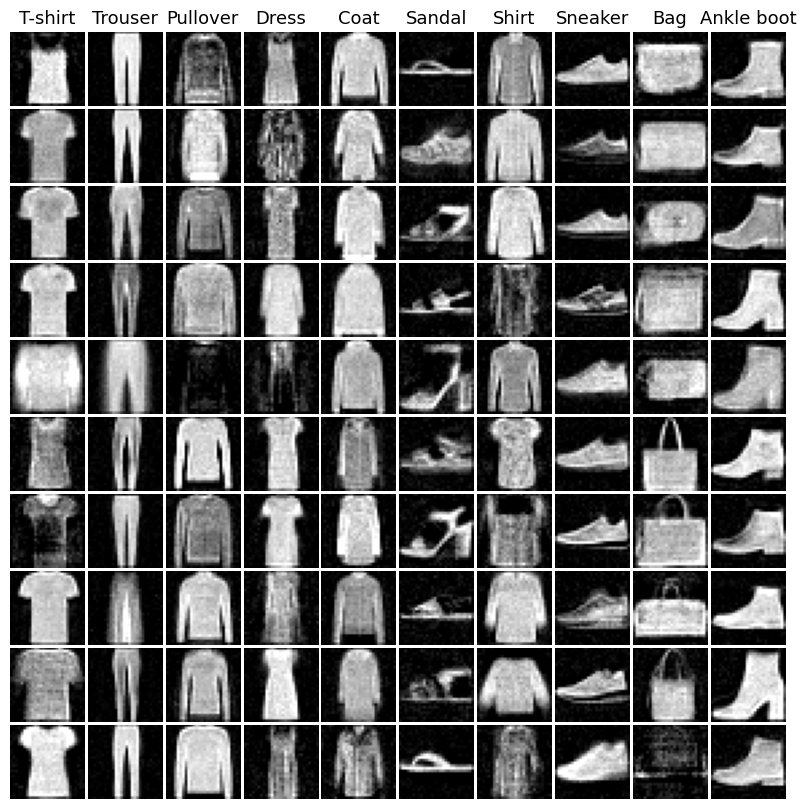

In [47]:
show_imgs(plot_n_samples, method, tgt_dataset=tgt_dataset)

In [48]:
n_samples = [10, 50]
method = "dm_aug"
tgt_dataset = "NormalizedFMNIST"

plot_result(n_samples, method, tgt_dataset=tgt_dataset)

10 Accuracy: 0.746762216091156 0.0079103477100701
50 Accuracy: 0.8143444975217183 0.009548182383458888


In [49]:
n_samples = [1, 10, 50]
method = "mmdsw_aug"
tgt_dataset = "NormalizedFMNIST"

plot_result(n_samples, method, tgt_dataset=tgt_dataset)

1 Accuracy: 0.6056661407152811 0.03643990844795137
10 Accuracy: 0.7664676308631897 0.010680793653783209
50 Accuracy: 0.849960207939148 0.0016565015095938189


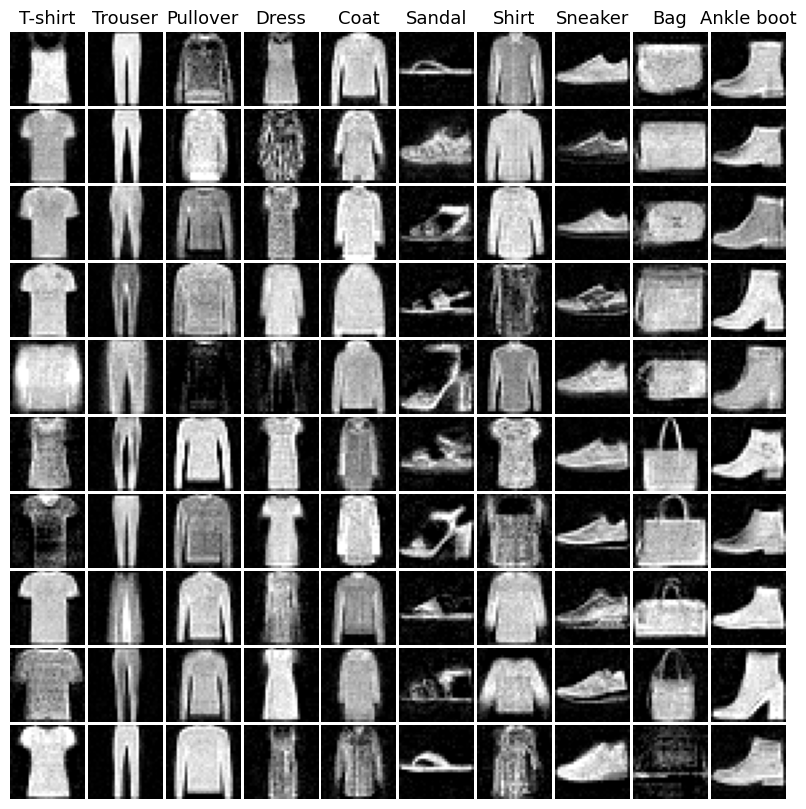

In [50]:
show_imgs(plot_n_samples, method, tgt_dataset=tgt_dataset, save=True)

In [51]:
n_samples = [1, 10, 50]
method = "dm_emb"
tgt_dataset = "NormalizedFMNIST"

plot_result(n_samples, method, tgt_dataset=tgt_dataset)

1 Accuracy: 0.5873673121134441 0.004258628888623959
10 Accuracy: 0.812407120068868 0.02282650976253536
50 Accuracy: 0.8755042672157287 0.0016020628883360308


In [52]:
n_samples = [1, 10, 50]
method = "mmdsw_emb"
tgt_dataset = "NormalizedFMNIST"

plot_result(n_samples, method, tgt_dataset=tgt_dataset)

1 Accuracy: 0.6086120009422302 0.02557367111575091
10 Accuracy: 0.7804273009300232 0.009383672457331911
50 Accuracy: 0.8763468821843465 0.0015864797910128826


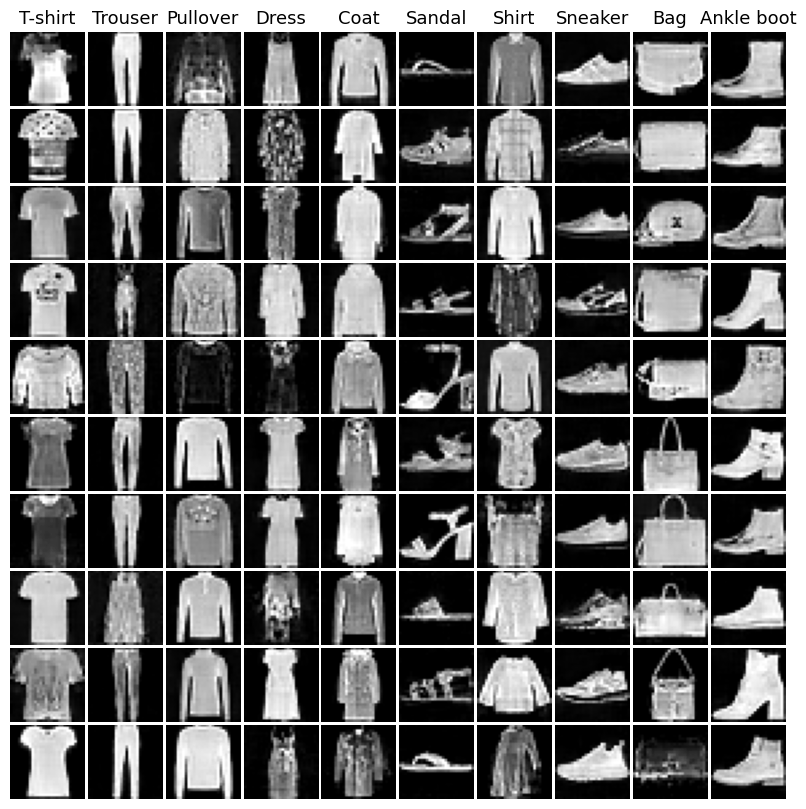

In [53]:
show_imgs(plot_n_samples, method, tgt_dataset=tgt_dataset)

In [54]:
n_samples = [1, 10, 50]
method = "dm_aug_emb"
tgt_dataset = "NormalizedFMNIST"

plot_result(n_samples, method, tgt_dataset=tgt_dataset)

1 Accuracy: 0.587446924050649 0.004565272713974882
10 Accuracy: 0.825033179918925 0.0025602481075190776
50 Accuracy: 0.8754047314325969 0.001321048243269439


In [55]:
n_samples = [1, 10, 50]
method = "mmdsw_aug_emb"
tgt_dataset = "NormalizedFMNIST"

plot_result(n_samples, method, tgt_dataset=tgt_dataset)

1 Accuracy: 0.6080745855967203 0.02182998286259271
10 Accuracy: 0.7885151386260987 0.012044860155669324
50 Accuracy: 0.8757232149442037 0.0016988798287831312


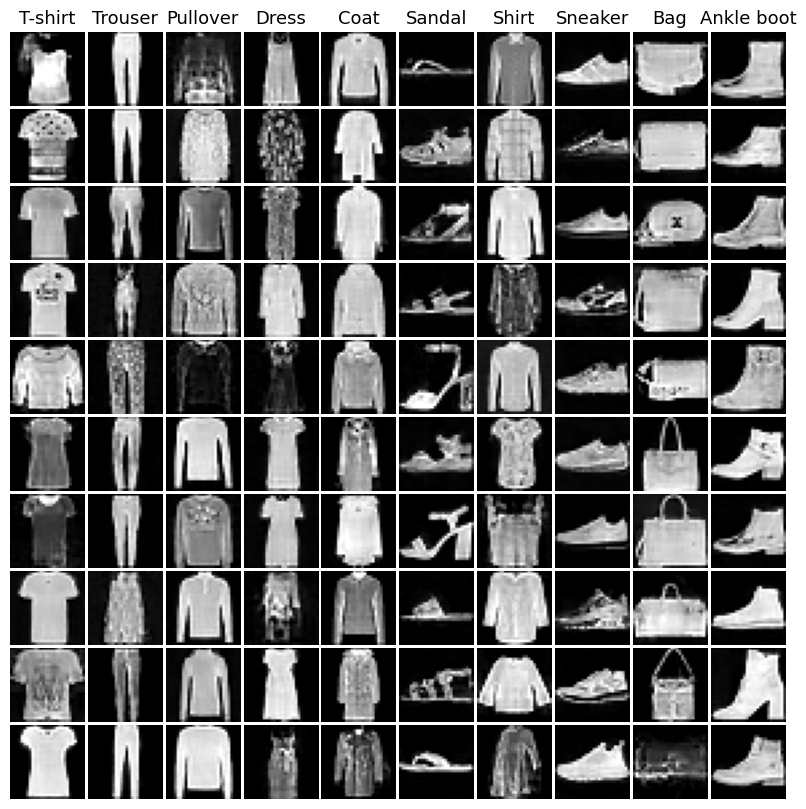

In [56]:
show_imgs(plot_n_samples, method, tgt_dataset=tgt_dataset, save=True)